# Import libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# User input

In [26]:
year_born = 1987

# Get the data

In [27]:
# The code below fetches the data from the "Our World in Data" Github page. 
# This is the data behind this graph/table: https://ourworldindata.org/grapher/cumulative-co-emissions
# If the url does not work you can also use the data provided, by uncommenting the line below.
df = pd.read_csv('./data/owid-co2-data.csv', header =0)
# df = pd.read_csv('https://nyc3.digitaloceanspaces.com/owid-public/data/co2/owid-co2-data.csv', header=0)

# Process the data

In [28]:
# Select only data for World
df = df[df['country'] == 'World']

# Select year and Cumulative CO2
df = df[['year','cumulative_co2']]

# Turn year to integer
df['year'] = df['year'].astype(int)

# Subtract from every cumulative value what has been emitted until 1750
df['cumulative_co2']=df['cumulative_co2']-df['cumulative_co2'].iloc[0]

# For every row:
# 1. Calculate difference between "cumulative CO2 in year i" and "cumulative CO2 in last year" 
# 2. Divide this difference with "cumulative CO2 in last year" 

sums = []

for i in range(len(df)):
    share_gen = (df['cumulative_co2'].iloc[-1]-df['cumulative_co2'].iloc[i])/df['cumulative_co2'].iloc[-1]*100
    sums.append(share_gen)

# Add the new column of sums to the original DataFrame
df['share_gen'] = sums

# Select every fifth row
df = df.iloc[::5]

# Select data for people who were born in the last 100 years
scope = int(100/5)
df = df.tail(scope).reset_index(drop=True)


# Plotting

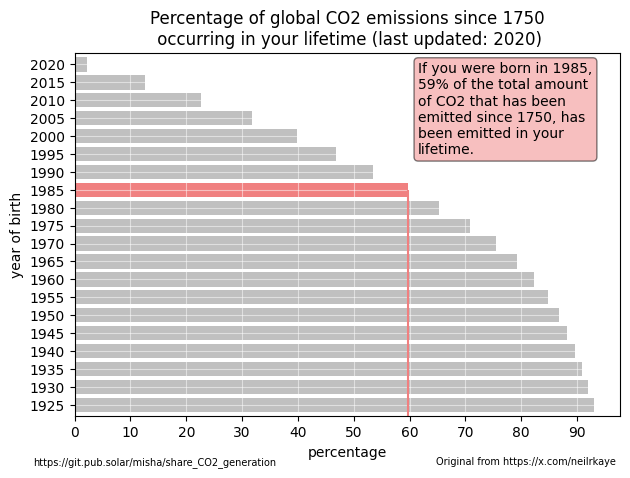

In [29]:
# Create a horizontal barplot of year against cumulative_co2
ax = df.plot.barh(x='year', y='share_gen', color = 'silver', width=0.8, linestyle = "")

# Add rasters to the plot
ax.grid(axis='x', linestyle='-', alpha=0.5, color = 'white', zorder=1)
ax.grid(axis='y', linestyle='-', alpha=0.5, color = 'white',  zorder=1)

# Add names to axes
ax.set_ylabel('year of birth')
ax.set_xlabel('percentage')

# Add title
ax.set_title('Percentage of global CO2 emissions since 1750\n occurring in your lifetime (last updated: %s)' % df['year'].iloc[-1])

# Turn off the legend
ax.legend().set_visible(False)

# Turn on raster
ax.set_xticks(range(0, 101, 10));

# Round the year born to intervals of 5
year_born_round = int(5 * round(float(year_born)/5))

# Find index in df of year born
year_born_index = df[df['year'] == year_born_round].index.tolist()[0]

# Add explainer to top right
props = dict(boxstyle='round', facecolor='lightcoral', alpha=0.5)
ax.text(0.63, 0.975, "If you were born in %s,\n%s%% of the total amount \nof CO2 that has been \nemitted since 1750, has \nbeen emitted in your \nlifetime." % 
(int(df['year'].iloc[year_born_index].item()), 
 int(df['share_gen'].iloc[year_born_index].item())), 
transform=ax.transAxes, fontsize=10,
verticalalignment='top', bbox=props);

# Give the right bar a different color
ax.patches[year_born_index].set_facecolor('lightcoral');

# Draw the vertical line towards the red bar
plt.vlines(x = df['share_gen'].iloc[year_born_index], ymin = -1, ymax = year_born_index, color='lightcoral');

plt.figtext(0.06, 0.02, 'https://git.pub.solar/misha/share_CO2_generation', fontsize = 7)  
plt.figtext(0.97, 0.02, 'Original from https://x.com/neilrkaye', ha='right', fontsize = 7)  # 

plt.tight_layout()
plt.show()
